In [13]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [599]:
data = pd.read_excel("일단_data_set.xlsx")

In [600]:
dd_set = pd.read_excel("일단_value_data.xlsx")

In [601]:
data = data[data['audience'] >= 10000]

In [602]:
data = data.reset_index(drop=True)

In [603]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   movieNm          2641 non-null   object        
 1   openDt           2641 non-null   datetime64[ns]
 2   total_money      2641 non-null   int64         
 3   audience         2641 non-null   int64         
 4   screen_num       2641 non-null   int64         
 5   show_num         2641 non-null   int64         
 6   배급사              2635 non-null   object        
 7   movieCd          2641 non-null   object        
 8   director         2641 non-null   object        
 9   prdtYear         2641 non-null   int64         
 10  typeNm           2641 non-null   object        
 11  repNationNm      2641 non-null   object        
 12  repGenreNm       2641 non-null   object        
 13  showTm           2636 non-null   float64       
 14  watchGradeNm     2640 non-null   object 

In [604]:
dd_set.drop(['distributor'],axis=1,inplace=True)
dd_set.drop(['typeNm'],axis=1,inplace=True)

In [605]:
modeling_data = pd.concat([dd_set,data["audience"]],axis=1)

scaling

In [606]:
X = modeling_data.iloc[:,:-1] #X = modeling_data.iloc[:,:-1]
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

dfX0 = pd.DataFrame(X_scaled, columns=X.columns)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(modeling_data.iloc[:,-1], columns=["audience"])
d_df = pd.concat([dfX, dfy], axis=1)
d_df

C:\Users\dudns\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,total_money,screen_num,show_num,star_score,star_user_count,netizen_score,netizen_count,director_score,openDt_score,prdtYear_score,repNationNm_score,repGenreNm_score,showTm_score,watchGradeNm_score,companyNm_score,actor_score,audience
0,1.0,8.2,5.6,6.3,2.3,9.0,7.0,7.8,6.4,9.6,6.6,5.6,4.0,6.3,6.4,10.4,9.5,12186327
1,1.0,5.8,5.6,3.1,2.2,12.5,6.0,9.1,7.3,8.9,6.6,5.6,5.0,6.3,7.8,10.4,5.6,8539495
2,1.0,5.4,4.1,4.9,2.2,6.7,6.4,4.0,3.7,9.6,6.1,5.6,6.2,6.3,6.4,10.4,7.1,7817618
3,1.0,5.1,5.8,5.6,2.2,4.7,6.4,3.0,8.3,12.4,6.6,5.0,6.2,6.3,7.8,10.4,7.6,7258678
4,1.0,4.8,3.9,5.1,2.3,5.7,7.1,4.6,4.4,8.9,6.6,5.6,5.0,6.3,6.0,10.4,3.0,6879841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,1.0,0.0,0.2,0.0,0.0,0.0,6.3,0.0,1.0,8.9,5.7,3.3,3.4,3.4,5.0,10.4,0.9,11116
2637,1.0,0.0,0.0,0.0,0.0,0.0,6.5,0.1,1.0,9.6,5.7,3.3,4.0,6.3,7.8,10.4,0.0,10913
2638,1.0,0.0,0.1,0.0,0.0,0.0,5.8,0.0,1.0,8.9,5.3,3.3,3.4,3.4,5.0,10.4,0.9,10885
2639,1.0,0.0,0.3,0.1,0.0,0.0,3.8,0.0,1.0,10.3,5.7,5.6,4.4,4.1,6.4,10.4,0.9,10449


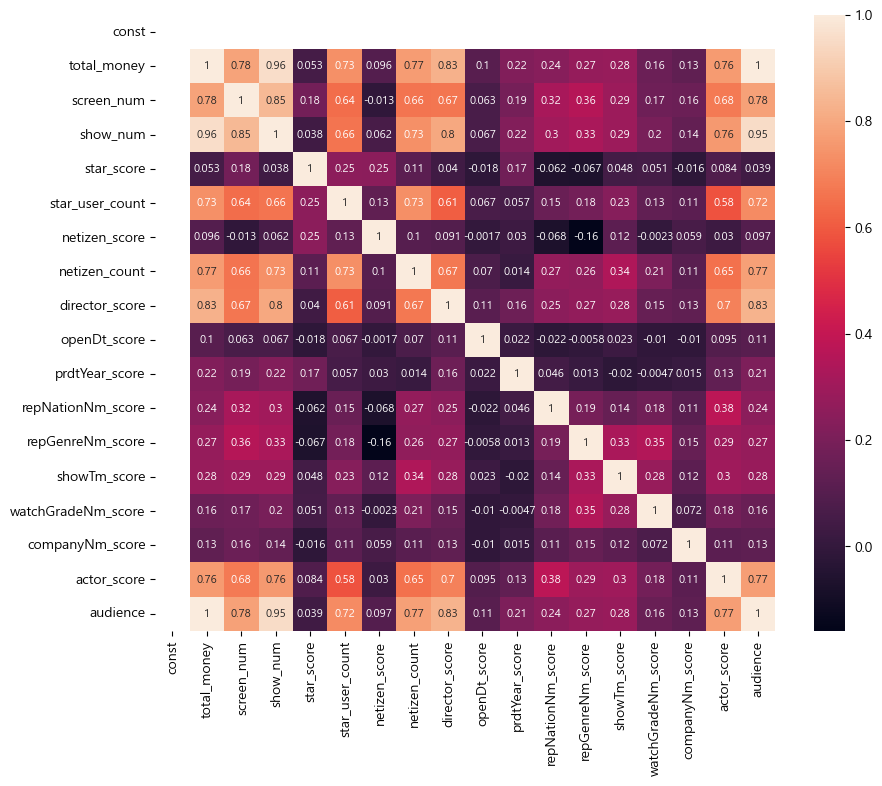

In [607]:
plt.figure(figsize=[10,8])
sns.heatmap(d_df.corr(), annot = True, annot_kws={"size": 8});
plt.show()

In [666]:
from sklearn.model_selection import train_test_split
X= d_df.iloc[:,:-1]
y = d_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Summary OLS

In [609]:
y_train.shape

(1980,)

In [610]:
target_df = d_df[['audience']]

In [611]:
feature_df = d_df[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score']] #'total_money',

In [612]:
model1 = sm.OLS(target_df,feature_df)
result1 = model1.fit()
print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:               audience   R-squared (uncentered):                   0.256
Model:                            OLS   Adj. R-squared (uncentered):              0.254
Method:                 Least Squares   F-statistic:                              129.6
Date:                Sun, 28 Nov 2021   Prob (F-statistic):                   2.94e-164
Time:                        20:55:38   Log-Likelihood:                         -41031.
No. Observations:                2641   AIC:                                  8.208e+04
Df Residuals:                    2634   BIC:                                  8.212e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [613]:
# model1의 테스트 R
from sklearn.metrics import mean_squared_error
rsquared_dict = {}
MSE_dict = {}
RMSE_dict = {}
pred = result1.predict(X_test[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score']])

rss = ((y_test - pred) ** 2).sum()
tss = ((y_test - y_test.mean()) ** 2).sum()
rsquared = 1 - rss/tss
print('rsquared = ', rsquared)
print('Mean_Squared_Error = ', mean_squared_error(pred, y_test))
print('RMSE = ', mean_squared_error(pred, y_test)**0.5)
rsquared_dict['model1'] = rsquared
MSE_dict['model1'] = mean_squared_error(pred, y_test)
RMSE_dict['model1'] = mean_squared_error(pred, y_test)**0.5

rsquared =  0.11889248782989448
Mean_Squared_Error =  2671201540179.499
RMSE =  1634381.0878064819


In [614]:
feature_df = d_df[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score','screen_num', 'show_num']]

In [615]:
model2 = sm.OLS(target_df, feature_df)
result2 = model2.fit()
print(result2.summary())

                                 OLS Regression Results                                
Dep. Variable:               audience   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              3964.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:55:47   Log-Likelihood:                         -37886.
No. Observations:                2641   AIC:                                  7.579e+04
Df Residuals:                    2632   BIC:                                  7.584e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [616]:
# model1의 테스트 R
from sklearn.metrics import mean_squared_error

pred = result2.predict(X_test[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score','screen_num', 'show_num']])

rss = ((y_test - pred) ** 2).sum()
tss = ((y_test - y_test.mean()) ** 2).sum()
rsquared = 1 - rss/tss
print('rsquared = ', rsquared)
print('Mean_Squared_Error = ', mean_squared_error(pred, y_test))
print('RMSE = ', mean_squared_error(pred, y_test)**0.5)
rsquared_dict['model2'] = rsquared
MSE_dict['model2'] = mean_squared_error(pred, y_test)
RMSE_dict['model2'] = mean_squared_error(pred, y_test)**0.5

rsquared =  0.9140328744598893
Mean_Squared_Error =  260621450817.0199
RMSE =  510510.970319953


In [617]:
feature_df = d_df[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score','screen_num', 'show_num','star_score','star_user_count', 'netizen_score', 'netizen_count']] #'total_money',

In [618]:
model3 = sm.OLS(target_df, feature_df)
result3 = model3.fit()
print(result3.summary())

                                 OLS Regression Results                                
Dep. Variable:               audience   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              3853.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:55:53   Log-Likelihood:                         -37462.
No. Observations:                2641   AIC:                                  7.495e+04
Df Residuals:                    2628   BIC:                                  7.503e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [619]:
# model1의 테스트 R
from sklearn.metrics import mean_squared_error

pred = result3.predict(X_test[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score','screen_num', 'show_num','star_score','star_user_count', 'netizen_score', 'netizen_count']])

rss = ((y_test - pred) ** 2).sum()
tss = ((y_test - y_test.mean()) ** 2).sum()
rsquared = 1 - rss/tss
print('rsquared = ', rsquared)
print('Mean_Squared_Error = ', mean_squared_error(pred, y_test))
print('RMSE = ', mean_squared_error(pred, y_test)**0.5)
rsquared_dict['model3'] = rsquared
MSE_dict['model3'] = mean_squared_error(pred, y_test)
RMSE_dict['model3'] = mean_squared_error(pred, y_test)**0.5

rsquared =  0.9481228877832348
Mean_Squared_Error =  157272773344.29843
RMSE =  396576.31465368485


In [620]:
feature_df = d_df[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score','screen_num', 'show_num','star_score','star_user_count', 'netizen_score', 'netizen_count','actor_score', 'director_score' ]] #'total_money',

In [621]:
model4 = sm.OLS(target_df, feature_df)
result4 = model4.fit()
print(result4.summary())

                                 OLS Regression Results                                
Dep. Variable:               audience   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              3852.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:55:54   Log-Likelihood:                         -37281.
No. Observations:                2641   AIC:                                  7.459e+04
Df Residuals:                    2626   BIC:                                  7.468e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [622]:
# model1의 테스트 R
from sklearn.metrics import mean_squared_error

pred = result4.predict(X_test[['openDt_score', 'prdtYear_score', 'repNationNm_score','repGenreNm_score', 'showTm_score', 'watchGradeNm_score','companyNm_score','screen_num', 'show_num','star_score','star_user_count', 'netizen_score', 'netizen_count','actor_score', 'director_score']])

rss = ((y_test - pred) ** 2).sum()
tss = ((y_test - y_test.mean()) ** 2).sum()
rsquared = 1 - rss/tss
print('rsquared = ', rsquared)
print('Mean_Squared_Error = ', mean_squared_error(pred, y_test))
print('RMSE = ', mean_squared_error(pred, y_test)**0.5)
rsquared_dict['model4'] = rsquared
MSE_dict['model4'] = mean_squared_error(pred, y_test)
RMSE_dict['model4'] = mean_squared_error(pred, y_test)**0.5

rsquared =  0.9554321849064358
Mean_Squared_Error =  135113609492.61816
RMSE =  367578.0318417005


In [623]:
feature_df = d_df[['screen_num', 'show_num','star_user_count', 'netizen_count','actor_score', 'director_score']]

In [624]:
model5 = sm.OLS(target_df, feature_df)
result5 = model5.fit()
print(result5.summary())

                                 OLS Regression Results                                
Dep. Variable:               audience   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              7869.
Date:                Sun, 28 Nov 2021   Prob (F-statistic):                        0.00
Time:                        20:55:56   Log-Likelihood:                         -37540.
No. Observations:                2641   AIC:                                  7.509e+04
Df Residuals:                    2635   BIC:                                  7.513e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [625]:
# model1의 테스트 R
from sklearn.metrics import mean_squared_error

pred = result5.predict(X_test[['screen_num', 'show_num','star_user_count', 'netizen_count','actor_score', 'director_score']])

rss = ((y_test - pred) ** 2).sum()
tss = ((y_test - y_test.mean()) ** 2).sum()
rsquared = 1 - rss/tss
print('rsquared = ', rsquared)
print('Mean_Squared_Error = ', mean_squared_error(pred, y_test))
print('RMSE = ', mean_squared_error(pred, y_test)**0.5)
rsquared_dict['model5'] = rsquared
MSE_dict['model5'] = mean_squared_error(pred, y_test)
RMSE_dict['model5'] = mean_squared_error(pred, y_test)**0.5

rsquared =  0.9466148666635054
Mean_Squared_Error =  161844551795.85593
RMSE =  402299.08251928183


In [626]:
RMSE_dict , MSE_dict , rsquared_dict

({'model1': 1634381.0878064819,
  'model2': 510510.970319953,
  'model3': 396576.31465368485,
  'model4': 367578.0318417005,
  'model5': 402299.08251928183},
 {'model1': 2671201540179.499,
  'model2': 260621450817.0199,
  'model3': 157272773344.29843,
  'model4': 135113609492.61816,
  'model5': 161844551795.85593},
 {'model1': 0.11889248782989448,
  'model2': 0.9140328744598893,
  'model3': 0.9481228877832348,
  'model4': 0.9554321849064358,
  'model5': 0.9466148666635054})

In [627]:
RMSE_min_key = min(RMSE_dict, key = RMSE_dict.get)
MSE_min_key = min(MSE_dict, key = MSE_dict.get)
rsquare_max_key = max(rsquared_dict, key = rsquared_dict.get)

In [628]:
RMSE_min_key, MSE_min_key, rsquare_max_key

('model4', 'model4', 'model4')

LinearRegression 모델 및 예측

In [746]:
from sklearn.model_selection import train_test_split
X= d_df.iloc[:,1:-1]
y = d_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [748]:
model = LinearRegression() 
model.fit(X = X_train, y = y_train) 

np.set_printoptions(precision=6, suppress=True)
y_pred = model.predict(X=X_test) # 예측치 
y_true = y_test # 정답 

In [749]:
final = pd.DataFrame({"actual":y_true,"pred":y_pred})

In [750]:
final

,actual,pred
762,57553,335081.3
1357,23014,53959.9
2196,73215,140441.4
2100,11199,34921.8
1519,359041,327355.4
...,...,...
1824,228899,245167.1
2618,17064,36015.1
602,10910,28608.5
983,127325,205336.6


In [755]:
import sklearn
model_dict ={}
mse = sklearn.metrics.mean_squared_error(y_true, y_pred) 
model_dict['Linear'] = mse

In [756]:
model = lgb.LGBMRegressor(random_state=1234, n_estimators=1000)

In [757]:
from lightgbm import LGBMRegressor
model.fit(X_train, y_train)
LGBMRegressor(n_estimators=1000, random_state=1234)

LGBMRegressor(n_estimators=1000, random_state=1234)

In [758]:
submission = pd.DataFrame({"actual":y_test})
submission["pred"] = " "

In [759]:
singleGBM = submission.copy()
singleGBM['pred'] = model.predict(X_test)
#singleGBM.to_csv('sigleGBM.csv', index=False)
singleGBM

,actual,pred
762,57553,13760.0
1357,23014,23382.5
2196,73215,60742.6
2100,11199,19422.9
1519,359041,332959.8
...,...,...
1824,228899,232154.6
2618,17064,18116.5
602,10910,13610.4
983,127325,107205.5


In [762]:
mse = mean_squared_error(singleGBM['actual'], singleGBM['pred']) ** 0.5 # RMSE = mean_squared_error(y, y_pred)**0.5
model_dict['singleGBM'] = mse

In [763]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [764]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=1234,n_estimators=1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

C:\Users\dudns\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\dudns\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 1.6915e+10
[100]	valid_0's l2: 4.09013e+10
[100]	valid_0's l2: 1.42913e+11
[200]	valid_0's l2: 1.34156e+11
[300]	valid_0's l2: 1.37153e+11
[100]	valid_0's l2: 7.93328e+10
[200]	valid_0's l2: 6.66366e+10
[300]	valid_0's l2: 6.35191e+10
[400]	valid_0's l2: 6.12979e+10
[500]	valid_0's l2: 5.83544e+10
[600]	valid_0's l2: 5.68049e+10
[700]	valid_0's l2: 5.64085e+10
[800]	valid_0's l2: 5.62757e+10
[900]	valid_0's l2: 5.58613e+10
[1000]	valid_0's l2: 5.5734e+10
[100]	valid_0's l2: 2.10323e+10


In [765]:
preds = []

for model in models:
    preds.append(model.predict(X_test))

In [766]:
kFoldLightGBM = submission.copy()
kFoldLightGBM['pred'] = np.mean(preds, axis=0)
kFoldLightGBM

,actual,pred
762,57553,222966.4
1357,23014,23541.6
2196,73215,79059.3
2100,11199,18714.1
1519,359041,388411.1
...,...,...
1824,228899,247513.8
2618,17064,17924.9
602,10910,12234.6
983,127325,111601.9


In [769]:
mse = mean_squared_error(kFoldLightGBM['actual'], kFoldLightGBM['pred']) ** 0.5 # RMSE = mean_squared_error(y, y_pred)**0.5
model_dict['kFoldLightGBM'] = mse

In [770]:
from sklearn.model_selection import GridSearchCV

In [771]:
params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'min_child_samples': [20, 30]}

gs = GridSearchCV(estimator=model,
                 param_grid=params,
                  scoring= 'neg_mean_squared_error',
                  cv=k_fold)

In [772]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=1234),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [773]:
gs.best_params_

{'learning_rate': 0.01, 'min_child_samples': 20}

In [774]:
model = lgb.LGBMRegressor(random_state=1234,n_estimators=1000, learning_rate=0.01, min_child_samples=20)

In [775]:
models = []

for train_idx, val_idx in k_fold.split(X_train):
    x_t = X_train.iloc[train_idx]
    y_t = y_train.iloc[train_idx]
    x_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]
    
    models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))

C:\Users\dudns\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\dudns\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 1.44014e+11
[200]	valid_0's l2: 2.26906e+10
[300]	valid_0's l2: 1.30255e+10
[400]	valid_0's l2: 1.40003e+10
[100]	valid_0's l2: 1.72783e+11
[200]	valid_0's l2: 3.95657e+10
[300]	valid_0's l2: 2.86858e+10
[400]	valid_0's l2: 2.96732e+10
[100]	valid_0's l2: 6.08313e+11
[200]	valid_0's l2: 2.85774e+11
[300]	valid_0's l2: 2.01448e+11
[400]	valid_0's l2: 1.7276e+11
[500]	valid_0's l2: 1.59285e+11
[600]	valid_0's l2: 1.51284e+11
[700]	valid_0's l2: 1.48175e+11
[800]	valid_0's l2: 1.46673e+11
[900]	valid_0's l2: 1.45346e+11
[1000]	valid_0's l2: 1.44126e+11
[100]	valid_0's l2: 3.89422e+11
[200]	valid_0's l2: 1.4687e+11
[300]	valid_0's l2: 1.03559e+11
[400]	valid_0's l2: 9.14369e+10
[500]	valid_0's l2: 8.65852e+10
[600]	valid_0's l2: 8.47202e+10
[700]	valid_0's l2: 8.33901e+10
[800]	valid_0's l2: 8.2619e+10
[900]	valid_0's l2: 8.32018e+10
[100]	valid_0's l2: 2.8225e+11
[200]	valid_0's l2: 7.60392e+10
[300]	valid_0's l2: 3.74882e+10
[400]	valid_0's l2: 2.71326e+10
[500]	valid

In [776]:
preds = []

for model in models:
    preds.append(model.predict(X_test))

In [777]:
gridSearchGBM = submission.copy()
gridSearchGBM['pred'] = np.mean(preds, axis=0)
gridSearchGBM

,actual,pred
762,57553,244522.6
1357,23014,24605.4
2196,73215,77954.8
2100,11199,17151.1
1519,359041,374881.4
...,...,...
1824,228899,247621.5
2618,17064,18172.0
602,10910,12143.9
983,127325,109814.7


In [780]:
mse = mean_squared_error(gridSearchGBM['actual'], gridSearchGBM['pred']) ** 0.5 # RMSE = mean_squared_error(y, y_pred)**0.5
model_dict['gridSearchGBM'] = mse

In [781]:
model_dict

{'Linear': 12966484945.384186,
 'singleGBM': 415399.3633318913,
 'kFoldLightGBM': 408175.5320783331,
 'gridSearchGBM': 410213.3502397011}

In [782]:
min(model_dict, key = model_dict.get)

'kFoldLightGBM'

관객수 top10 영화 관객수 예측

In [542]:
model = LinearRegression()
model.fit(d_df.iloc[:,:-1], d_df.iloc[:,-1])

LinearRegression()

In [553]:
def pre_result(number):
    a = d_df[d_df['audience'].index==number]  #audience 포함
    return model.predict(a.iloc[:,:-1]) #audience 포함X
    
result = pre_result(1448)
print('예측:', result)

예측: [24004.673453]


In [554]:
def act_result(number):
    
    return d_df[d_df["audience"].index==number]["audience"].values
result = act_result(1448)
print('실제:', result)

실제: [10092]


In [475]:
def result_total(number):
    a = d_df[d_df["audience"].index==number]
    print(model.predict(a.iloc[:,:-1]))    
    print(d_df[d_df["audience"].index==number]["audience"])

In [476]:
result_total(0)

[11753991.638729]
0    12186327
Name: audience, dtype: int64


In [562]:
data_index = data.sort_values(ascending = False,by = 'audience').head(10)

In [579]:
df1=pd.DataFrame()

for index,row in data_index.iterrows():
    df1 = df1.append(pd.DataFrame([[row['movieNm'],act_result(index),pre_result(index)]], columns=['movieNm','actual_audience','predict_audience']), ignore_index=True)

In [580]:
df1

,movieNm,actual_audience,predict_audience
0,극한직업,[16265618],[16980507.45792176]
1,어벤져스: 엔드게임,[13934592],[14743200.829585396]
2,겨울왕국 2,[13369064],[13797477.66010367]
3,7번방의 선물,[12811206],[11648428.671935286]
4,알라딘,[12552283],[12901523.052998938]
5,신과함께-인과 연,[12274996],[12529761.16241463]
6,택시운전사,[12186327],[11753991.638728984]
7,부산행,[11565479],[11129874.391811123]
8,어벤져스: 인피니티 워,[11212710],[12188313.772315696]
9,어벤져스: 에이지 오브 울트론,[10494499],[10726016.341762297]


In [581]:
df1['actual_audience']= df1['actual_audience'].astype(str).str.replace("[","")
df1['actual_audience']= df1['actual_audience'].astype(str).str.replace("]","")
df1['predict_audience']= df1['predict_audience'].astype(str).str.replace("[","")
df1['predict_audience']= df1['predict_audience'].astype(str).str.replace("]","")

<ipython-input-581-56650e182b48>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['actual_audience']= df1['actual_audience'].astype(str).str.replace("[","")
<ipython-input-581-56650e182b48>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['actual_audience']= df1['actual_audience'].astype(str).str.replace("]","")
<ipython-input-581-56650e182b48>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['predict_audience']= df1['predict_audience'].astype(str).str.replace("[","")
<ipython-input-581-56650e182b48>:4: Futur

In [582]:
df1['actual_audience']= df1['actual_audience'].astype(int)
df1['predict_audience']= df1['predict_audience'].astype(float)

In [583]:
df1['차이값'] = df1['actual_audience'] - df1['predict_audience']

In [584]:
df1

,movieNm,actual_audience,predict_audience,차이값
0,극한직업,16265618,16980507.5,-714889.5
1,어벤져스: 엔드게임,13934592,14743200.8,-808608.8
2,겨울왕국 2,13369064,13797477.7,-428413.7
3,7번방의 선물,12811206,11648428.7,1162777.3
4,알라딘,12552283,12901523.1,-349240.1
5,신과함께-인과 연,12274996,12529761.2,-254765.2
6,택시운전사,12186327,11753991.6,432335.4
7,부산행,11565479,11129874.4,435604.6
8,어벤져스: 인피니티 워,11212710,12188313.8,-975603.8
9,어벤져스: 에이지 오브 울트론,10494499,10726016.3,-231517.3


In [585]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

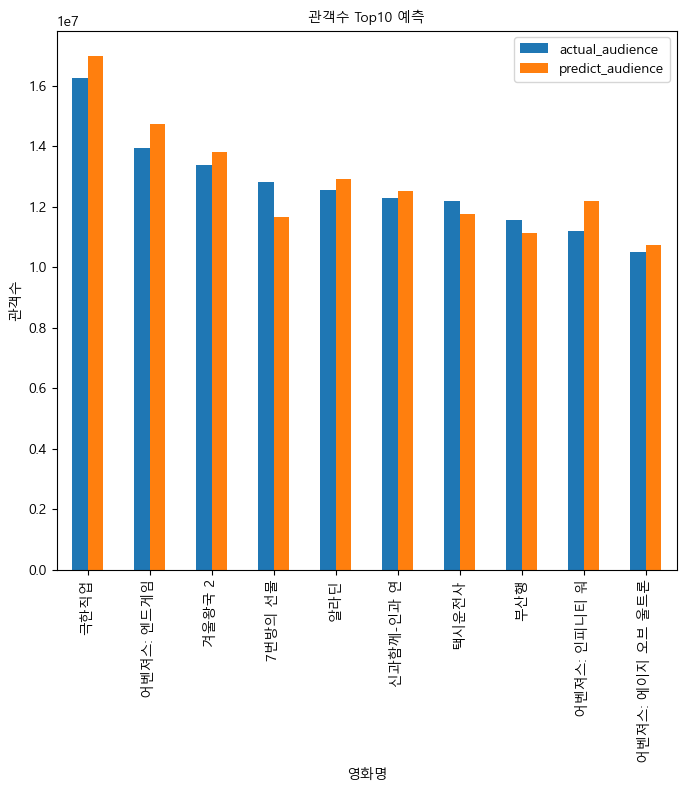

In [586]:
import matplotlib.pyplot as plt
df1.plot(x="movieNm", y=["actual_audience","predict_audience"], kind="bar",figsize=(8,7))
plt.title('관객수 Top10 예측', fontsize=10)
plt.xlabel('영화명', fontsize=10)
plt.ylabel('관객수', fontsize=10)
plt.show()